# KPMG Virtual Internship 



In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as mpl 
import category_encoders as ce
import datetime as dt
import seaborn as sn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
%autosave 60

Autosaving every 60 seconds


In [3]:
#Reading files
Cust_Dem = pd.read_excel(r'C:\Users\rahul\Documents\CODING\KPMG Virtual Internship\KPMG_DS1.xlsx', sheet_name = "CustomerDemographic")
Transactions = pd.read_excel(r'C:\Users\rahul\Documents\CODING\KPMG Virtual Internship\KPMG_DS1.xlsx', sheet_name = "Transactions", skiprows=1)
NewCustomerList = pd.read_excel(r'C:\Users\rahul\Documents\CODING\KPMG Virtual Internship\KPMG_DS1.xlsx', sheet_name = "NewCustomerList" , skiprows=1)

NCL = NewCustomerList
CD = Cust_Dem
Tr = Transactions

### TASK: 1 - Data Quality Assessment:
#### Assessment of data quality and completeness in preparation for analysis.

In [4]:
#function to print basic information about the datasets and check for discrepancies like missing and erroneous values
def task1(t1df):
    print(t1df.info())
    print(t1df[t1df.duplicated()])
    for i in t1df.columns:
        print(i, " has " , t1df[i].isnull().sum(axis = 0), " null values")
        if(t1df[i].dtype !=  "object"):
            print("Maximum: " , t1df[i].max(), "  ","Minimum: " , t1df[i].min())
        if(t1df[i].dtype ==  "object"):
            print(pd.unique(t1df[i]))    
          
        print("----------------------------------")
        


In [5]:
task1(CD)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   int64         
 1   first_name                           3999 non-null   object        
 2   last_name                            3874 non-null   object        
 3   gender                               3999 non-null   object        
 4   past_3_years_bike_related_purchases  3999 non-null   int64         
 5   DOB                                  3912 non-null   datetime64[ns]
 6   job_title                            3493 non-null   object        
 7   job_industry_category                3343 non-null   object        
 8   wealth_segment                       3999 non-null   object        
 9   deceased_indicator                   3999 non-null   object        
 10  default     

In [6]:
task1(NCL)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [7]:
task1(Tr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### Converting Date of Birth to Age, replacing erroneous and missing values,  and dropping non-useful fields

In [8]:
Transactions = Transactions[Transactions['customer_id'] <= 4000] #Given customer_id is only upto 4000, but shown 5034 in Transactions dataset
#Transactions = Transactions.drop(columns = ["transaction_id"])

Cust_Dem["Age"] = ((dt.datetime.today() - Cust_Dem['DOB']).dt.days*0.00273973).apply(np.floor)
Cust_Dem_plot = Cust_Dem.drop(columns = [ "first_name", "last_name", "default",  "job_title", "address", "postcode", "country"] )

#replacing erroneous values
Cust_Dem_plot["state"].replace({'New South Wales':"NSW", "Victoria": "VIC"}, inplace = True)
Cust_Dem_plot["gender"].replace({'F':"Female", "Femal":"Female", "M": "Male"}, inplace = True)
CDP = Cust_Dem_plot

#filling missing values
CDP['Age'].fillna(np.median(CDP['Age'].dropna()), inplace = True)
CDP['tenure'].fillna(np.median(CDP['tenure'].dropna()), inplace = True)
CDP['property_valuation'].fillna(np.median(CDP['property_valuation'].dropna()), inplace = True)
CDP['job_industry_category'].fillna('Missing', inplace=True)  
CDP['state'].fillna('NA', inplace=True)


NewCustomerList["Age"] = ((dt.datetime.today() - NewCustomerList['DOB']).dt.days*0.00273973).apply(np.floor)
NewCustomerList = NewCustomerList.drop(columns = ['deceased_indicator' ,'Rank', 'Value',  "first_name", "last_name",   "job_title", "address", "postcode", "country",  'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'] )

NewCustomerList['Age'].fillna(np.median(NewCustomerList['Age'].dropna()), inplace = True)
NewCustomerList['job_industry_category'].fillna('Missing', inplace=True)       

In [31]:
NCL = NewCustomerList

In [9]:
#Now the dataframes look like:
task1(CDP)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   int64         
 1   gender                               3999 non-null   object        
 2   past_3_years_bike_related_purchases  3999 non-null   int64         
 3   DOB                                  3912 non-null   datetime64[ns]
 4   job_industry_category                3999 non-null   object        
 5   wealth_segment                       3999 non-null   object        
 6   deceased_indicator                   3999 non-null   object        
 7   owns_car                             3999 non-null   object        
 8   tenure                               3999 non-null   float64       
 9   state                                3999 non-null   object        
 10  property_val

In [10]:

task1(CDP)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   int64         
 1   gender                               3999 non-null   object        
 2   past_3_years_bike_related_purchases  3999 non-null   int64         
 3   DOB                                  3912 non-null   datetime64[ns]
 4   job_industry_category                3999 non-null   object        
 5   wealth_segment                       3999 non-null   object        
 6   deceased_indicator                   3999 non-null   object        
 7   owns_car                             3999 non-null   object        
 8   tenure                               3999 non-null   float64       
 9   state                                3999 non-null   object        
 10  property_val

In [11]:
task1(NCL)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

### TASK: 2 - Data Insights
#### Targeting high value customers based on customer demographics and attributes.

In [12]:
#putting ages into bins
CDP["Age Group"] = pd.cut(CDP.Age, [0,20,30,40,50,60,9999], labels=["<20","20-30","30-40","40-50","50-60","60+"])

In [32]:
NCL["Age Group"] = pd.cut(NCL.Age, [0,20,30,40,50,60,9999], labels=["<20","20-30","30-40","40-50","50-60","60+"])

In [14]:
#getting profit and customer transaction data from Transaction dataset
Tr["profit"] = Tr["list_price"] - Tr["standard_cost"]

#creating a new dataset for the above
df_cols =['customer_id', 'low', 'medium', 'high', 'profit', 'avg profit']
product_class_df = pd.DataFrame( columns = df_cols)

for i in pd.unique(Tr['customer_id']):
    temp_df = Tr[Tr['customer_id'] == i]
    #print(i, len(temp_df))
    #print(temp_df['product_class'].value_counts())
    
    product_class_df = product_class_df.append({'customer_id' : i,'low' : len(temp_df[temp_df['product_class'] == 'low']), 'medium' : len(temp_df[temp_df['product_class'] == 'medium']), 'high' : len(temp_df[temp_df['product_class'] == 'high']), 'profit' : temp_df['profit'].sum(axis = 0), 'avg profit' : temp_df['profit'].sum(axis = 0)/len(temp_df)}, ignore_index=True)

print(product_class_df.head())

#Merging with Customer Demographic Dataset
df = Cust_Dem_plot.merge(product_class_df, on = 'customer_id')
df.head()

   customer_id  low  medium  high       profit  avg profit
0       5034.0  0.0     3.0   0.0   269.484972   89.828324
1       3500.0  0.0     5.0   1.0  1785.860000  297.643333
2       3499.0  1.0     6.0   0.0  4955.250000  707.892857
3       3498.0  0.0     5.0   1.0  3147.330000  524.555000
4       3497.0  0.0     3.0   0.0  1648.320000  549.440000


,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Age,Age Group,low,medium,high,profit,avg profit
0,1,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11.0,NSW,10.0,67.0,60+,2.0,8.0,1.0,3018.09,274.371818
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,N,Yes,16.0,NSW,10.0,40.0,30-40,0.0,3.0,0.0,2226.26,742.086667
2,3,Male,61,1954-01-20,Property,Mass Customer,N,Yes,15.0,QLD,9.0,67.0,60+,3.0,4.0,1.0,3362.81,420.351250
3,4,Male,33,1961-10-03,IT,Mass Customer,N,No,7.0,NSW,4.0,59.0,50-60,0.0,2.0,0.0,220.57,110.285000
4,5,Female,56,1977-05-13,Missing,Affluent Customer,N,Yes,8.0,VIC,9.0,44.0,40-50,2.0,3.0,1.0,2394.94,399.156667


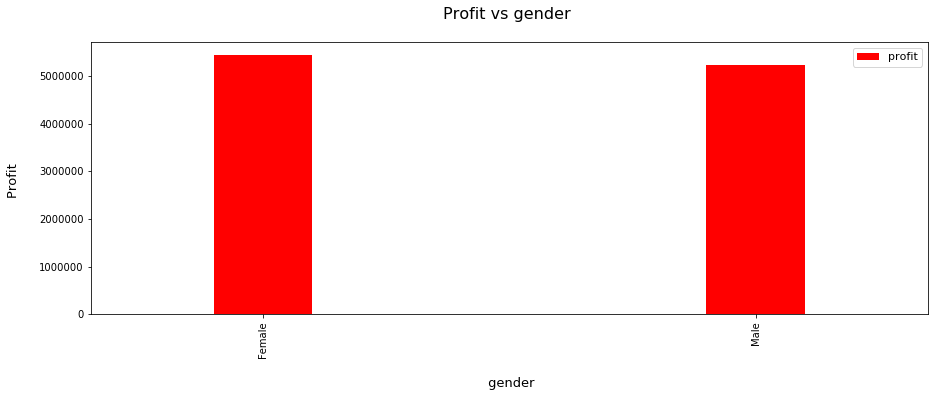

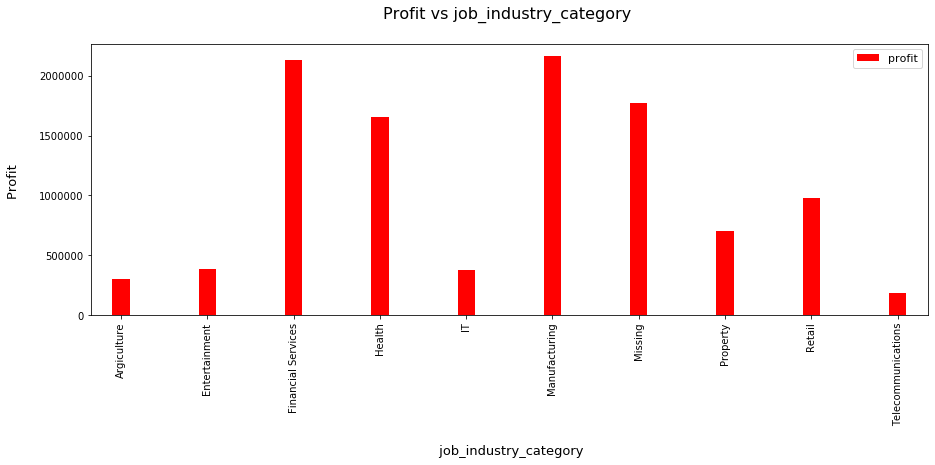

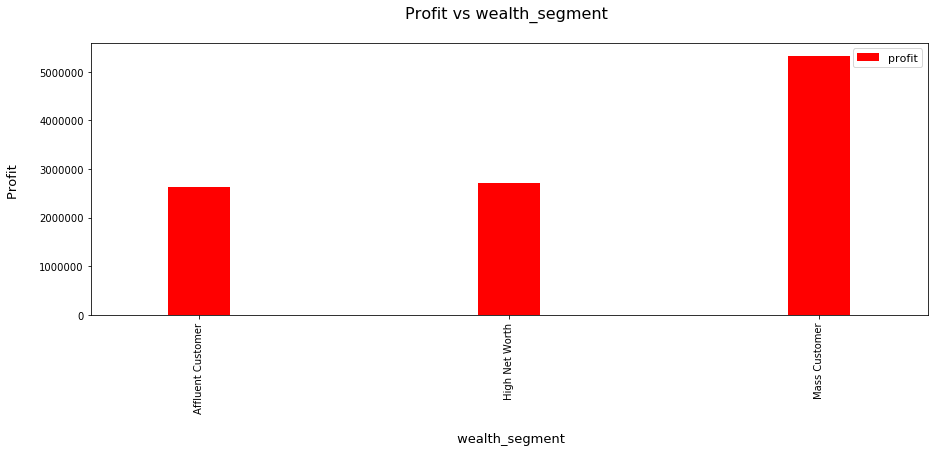

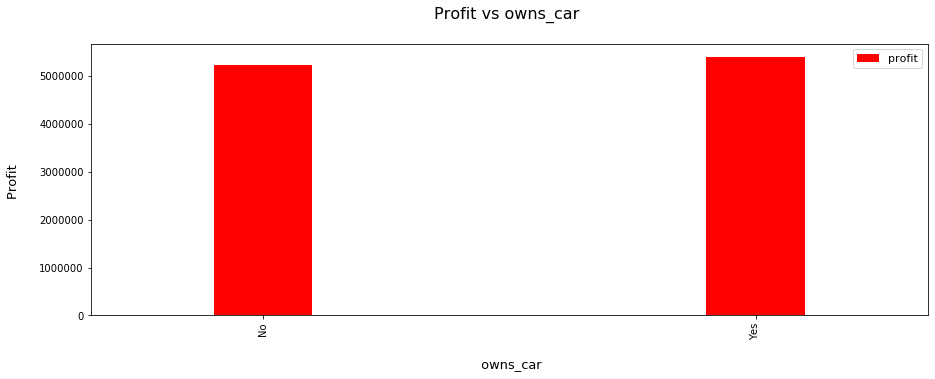

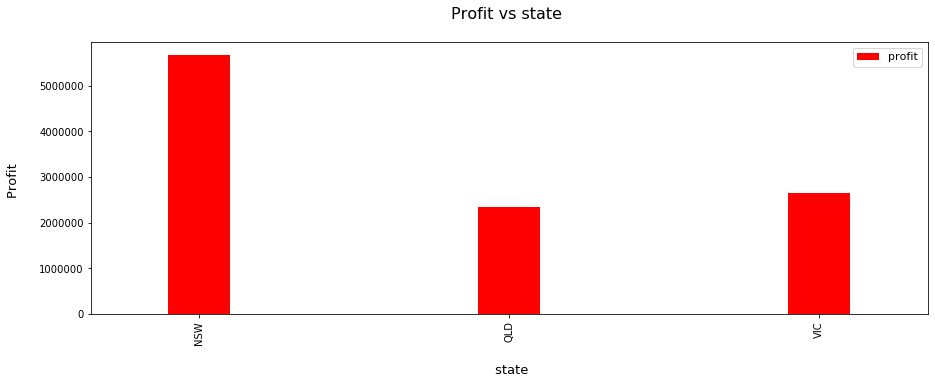

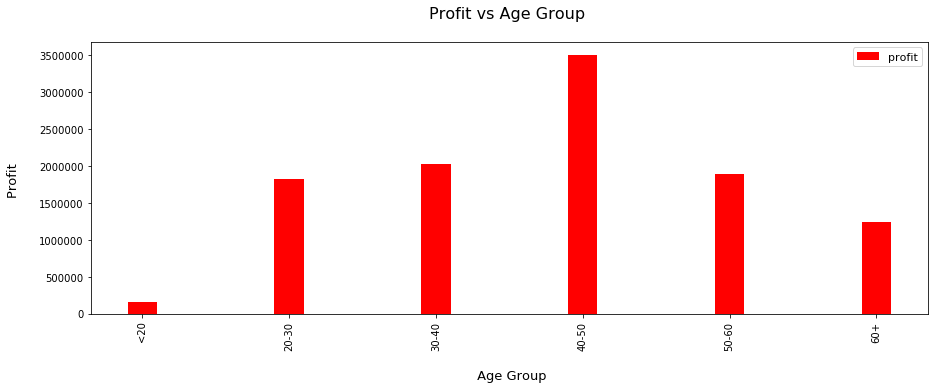

In [81]:
for i in df.drop(columns = ['customer_id', 'deceased_indicator', 'DOB', 'Age']).columns:
    if df[i].dtypes == 'object' or i == 'Age Group':
        df.groupby(i)["profit"].sum().plot(kind='bar',figsize=[15,5], width=0.2, color='red')
        mpl.title("Profit vs " +  i + " \n ", fontsize=16)
        mpl.xlabel("\n " +  i, fontsize=13,color="black")
        mpl.ylabel("Profit \n",fontsize=13, color="black")
        #mpl.xticks(rotation=0)
        #mpl.yticks(np.arange(0,4500,500))

        mpl.legend(loc='upper right',fontsize=11)

        label = df.groupby(i)["profit"].count()
        

        mpl.show()
    else:
        continue
                

In [16]:
Tr["recency"] = 0
task1(Tr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [21]:
Tr = Tr.dropna()
Tr["profit"] = Tr["list_price"] - Tr["standard_cost"]
comparison_date = dt.date.today()
Tr['transaction_date'] = pd.to_datetime(Tr['transaction_date']).dt.date
x = (comparison_date - Tr['transaction_date']).dt.days
Tr["recency"] = (x)
task1(Tr)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19445 non-null  int64  
 1   product_id               19445 non-null  int64  
 2   customer_id              19445 non-null  int64  
 3   transaction_date         19445 non-null  object 
 4   online_order             19445 non-null  float64
 5   order_status             19445 non-null  object 
 6   brand                    19445 non-null  object 
 7   product_line             19445 non-null  object 
 8   product_class            19445 non-null  object 
 9   product_size             19445 non-null  object 
 10  list_price               19445 non-null  float64
 11  standard_cost            19445 non-null  float64
 12  product_first_sold_date  19445 non-null  float64
 13  profit                   19445 non-null  float64
 14  recency               

In [22]:
rfmTable = Tr.groupby('customer_id').agg({'recency': lambda x:x.min(), 
                                                                      'product_id': lambda x: len(x), 
                                                                      'profit': lambda x: x.sum()})

rfmTable.rename(columns={'recency': 'recency', 
                         'product_id': 'frequency', 
                         'profit': 'monetary_value'}, inplace=True)
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,1284,11,3018.09
2,1405,3,2226.26
3,1379,7,3290.21
4,1472,2,220.57
5,1293,6,2394.94


In [23]:
rfmTable["monetary_value"] = rfmTable["monetary_value"].astype(int)
quartiles = rfmTable.quantile(q=[0,0.25,0.50,0.75,0.99])
print(quartiles, type(quartiles))

rfmTable["R_Score"] = 0
rfmTable["F_Score"] = 0
rfmTable["M_Score"] = 0

rfmTable.head()

      recency  frequency  monetary_value
0.00  1277.00        1.0           15.00
0.25  1295.00        4.0         1796.75
0.50  1322.00        5.0         2798.50
0.75  1365.00        7.0         4121.75
0.99  1543.09       11.0         8149.03 <class 'pandas.core.frame.DataFrame'>


,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,1284,11,3018,0,0,0
2,1405,3,2226,0,0,0
3,1379,7,3290,0,0,0
4,1472,2,220,0,0,0
5,1293,6,2394,0,0,0


In [24]:

for i in rfmTable.index:
    if (int(rfmTable["recency"][i])) > 1365:
        rfmTable["R_Score"][i] = 1
    elif ((int(rfmTable["recency"][i])) <=1365) & ((int(rfmTable["recency"][i])) > 1322):
        rfmTable["R_Score"][i] = 2
    elif ((int(rfmTable["recency"][i])) <=1322) & ((int(rfmTable["recency"][i])) > 1295):
        rfmTable["R_Score"][i] = 3
    else:
        rfmTable["R_Score"][i] = 4
        
for i in rfmTable.index:
    if (int(rfmTable["frequency"][i])) > 7:
        rfmTable["F_Score"][i] = 4
    elif ((int(rfmTable["frequency"][i])) <=7) & ((int(rfmTable["frequency"][i])) > 5):
        rfmTable["F_Score"][i] = 3
    elif ((int(rfmTable["frequency"][i])) <=5) & ((int(rfmTable["frequency"][i])) > 4):
        rfmTable["F_Score"][i] = 2
    else:
        rfmTable["F_Score"][i] = 1    
        
for i in rfmTable.index:
    if (int(rfmTable["monetary_value"][i])) > 4122:
        rfmTable["M_Score"][i] = 4
    elif ((int(rfmTable["monetary_value"][i])) <=4122) & ((int(rfmTable["monetary_value"][i])) > 2799):
        rfmTable["M_Score"][i] = 3
    elif ((int(rfmTable["monetary_value"][i])) <=2799) & ((int(rfmTable["monetary_value"][i])) > 1797):
        rfmTable["M_Score"][i] = 2
    else:
        rfmTable["M_Score"][i] = 1    
        
rfmTable        

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,1284,11,3018,4,4,3
2,1405,3,2226,1,1,2
3,1379,7,3290,1,3,3
4,1472,2,220,1,1,1
5,1293,6,2394,4,3,2
...,...,...,...,...,...,...
3497,1329,3,1648,2,1,1
3498,1404,6,3147,1,3,3
3499,1328,7,4955,2,3,4


In [25]:
rfmTable["RFM_Value"] = 0

for i in rfmTable.index:
    rfmTable["RFM_Value"][i] = (100*rfmTable["R_Score"][i]) + (10*rfmTable["F_Score"][i]) + rfmTable["M_Score"][i]
    
rfmTable    

,recency,frequency,monetary_value,R_Score,F_Score,M_Score,RFM_Value
customer_id,,,,,,,
1,1284,11,3018,4,4,3,443
2,1405,3,2226,1,1,2,112
3,1379,7,3290,1,3,3,133
4,1472,2,220,1,1,1,111
5,1293,6,2394,4,3,2,432
...,...,...,...,...,...,...,...
3497,1329,3,1648,2,1,1,211
3498,1404,6,3147,1,3,3,133
3499,1328,7,4955,2,3,4,234


In [26]:
df = df.merge(rfmTable, on = 'customer_id').dropna()
df.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,...,high,profit,avg profit,recency,frequency,monetary_value,R_Score,F_Score,M_Score,RFM_Value
0,1,Female,93,1953-10-12,Health,Mass Customer,N,Yes,11.0,NSW,...,1.0,3018.09,274.371818,1284,11,3018,4,4,3,443
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,N,Yes,16.0,NSW,...,0.0,2226.26,742.086667,1405,3,2226,1,1,2,112
2,3,Male,61,1954-01-20,Property,Mass Customer,N,Yes,15.0,QLD,...,1.0,3362.81,420.351250,1379,7,3290,1,3,3,133
3,4,Male,33,1961-10-03,IT,Mass Customer,N,No,7.0,NSW,...,0.0,220.57,110.285000,1472,2,220,1,1,1,111
4,5,Female,56,1977-05-13,Missing,Affluent Customer,N,Yes,8.0,VIC,...,1.0,2394.94,399.156667,1293,6,2394,4,3,2,432


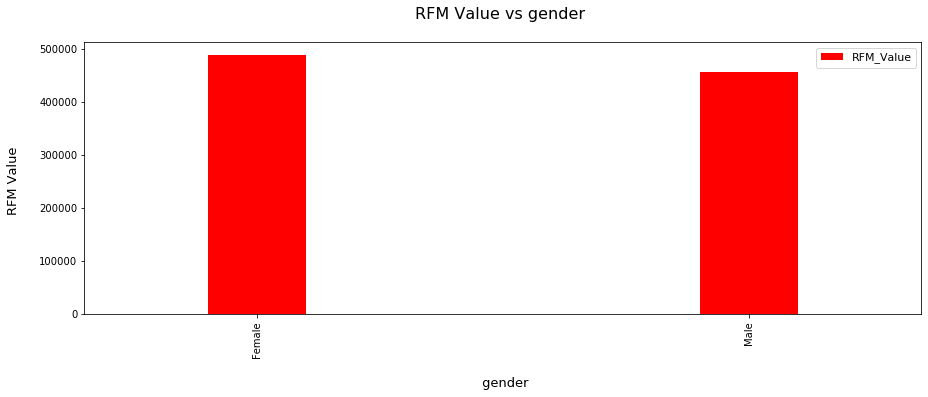

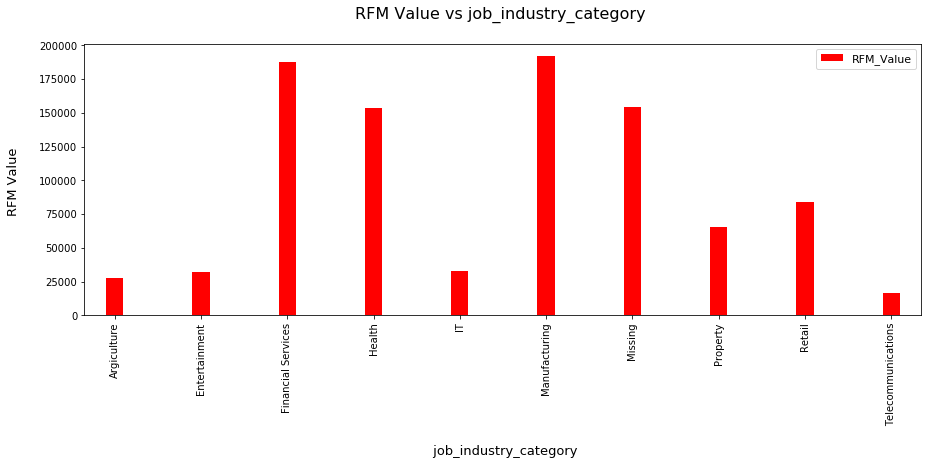

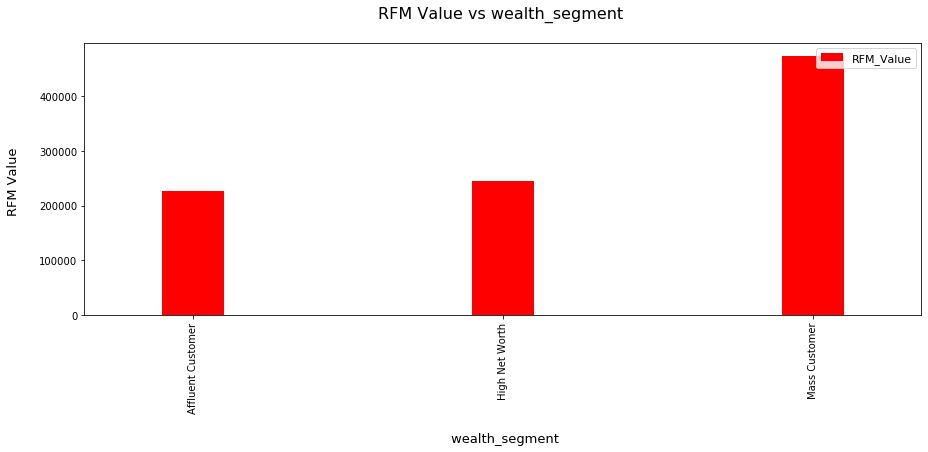

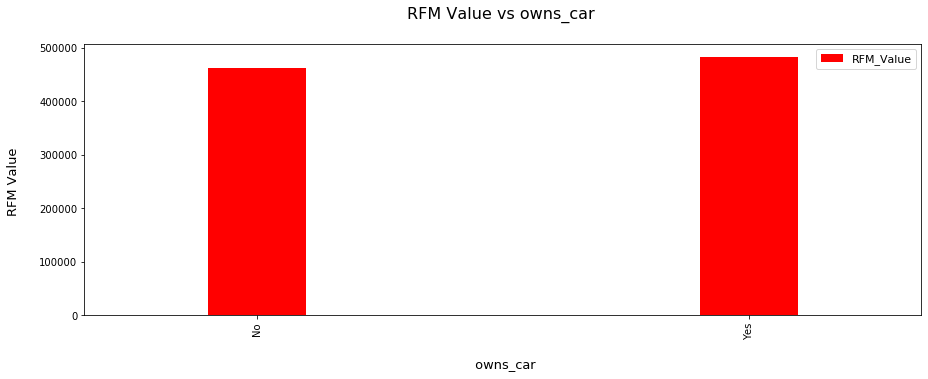

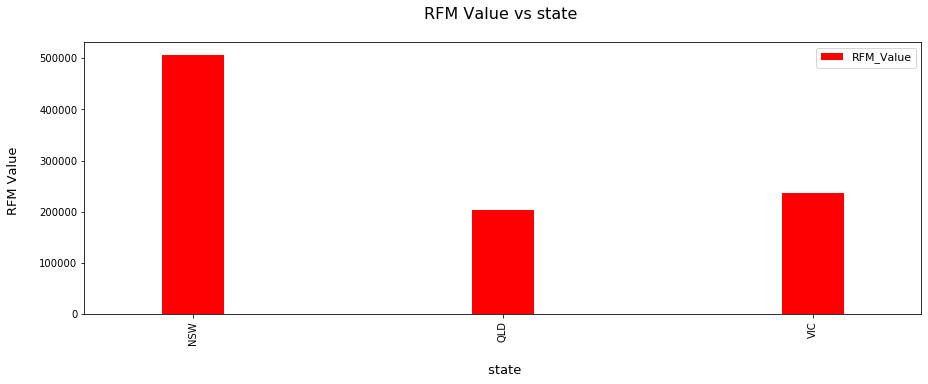

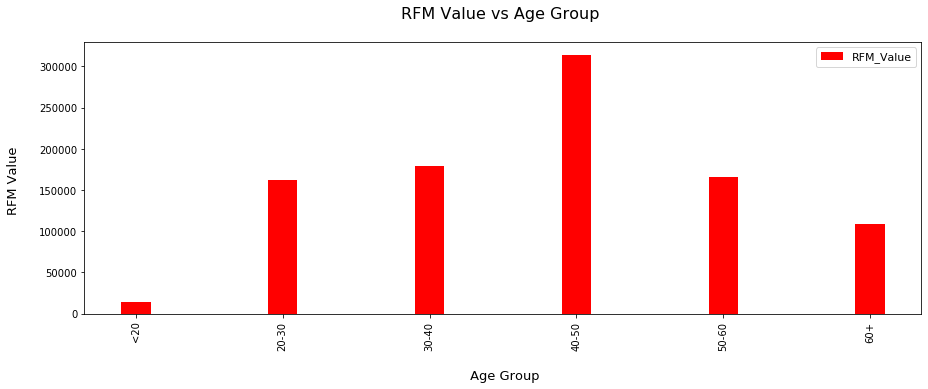

In [28]:
for i in df.drop(columns = ['customer_id', 'deceased_indicator', 'DOB', 'Age']).columns:
    if df[i].dtypes == 'object' or i == 'Age Group':
        df.groupby(i)["RFM_Value"].sum().plot(kind='bar',figsize=[15,5], width=0.2, color='red')
        mpl.title("RFM Value vs " +  i + " \n ", fontsize=16)
        mpl.xlabel("\n " +  i, fontsize=13,color="black")
        mpl.ylabel("RFM Value \n",fontsize=13, color="black")
        #mpl.xticks(rotation=0)
        #mpl.yticks(np.arange(0,4500,500))

        mpl.legend(loc='upper right',fontsize=11)

        label = df.groupby(i)["RFM_Value"].count()
        

        mpl.show()
    else:
        continue

In [33]:
NCL.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age,Age Group
0,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,14,QLD,6,64.0,60+
1,Male,69,1970-03-22,Property,Mass Customer,No,16,NSW,11,51.0,50-60
2,Female,10,1974-08-28,Financial Services,Affluent Customer,No,10,VIC,5,46.0,40-50
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,Yes,5,QLD,1,42.0,40-50
4,Female,34,1965-09-21,Financial Services,Affluent Customer,No,19,NSW,9,55.0,50-60


In [52]:
NCL_targets = NCL[NCL['Age Group'] == '40-50']

NCL_targets = NCL[NCL['job_industry_category'] == 'Manufacturing']
NCL_targets = NCL[NCL['job_industry_category'] == 'Financial Services']
NCL_targets = NCL[NCL['job_industry_category'] == 'Health']

NCL_targets = NCL[NCL['wealth_segment'] == 'Mass Customer']

NCL_targets = NCL[NCL['state'] == 'NSW']

NCL_targets

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,Age,Age Group
1,Male,69,1970-03-22,Property,Mass Customer,No,16,NSW,11,51.0,50-60
4,Female,34,1965-09-21,Financial Services,Affluent Customer,No,19,NSW,9,55.0,50-60
6,Male,23,1976-10-06,Financial Services,Mass Customer,No,8,NSW,7,44.0,40-50
8,Male,50,1972-04-28,Manufacturing,Mass Customer,Yes,5,NSW,10,49.0,40-50
12,Male,60,1990-05-13,Telecommunications,Mass Customer,No,9,NSW,11,31.0,30-40
...,...,...,...,...,...,...,...,...,...,...,...
989,Female,83,1945-07-26,Manufacturing,High Net Worth,Yes,11,NSW,8,75.0,60+
993,Male,38,1959-07-13,Financial Services,Mass Customer,Yes,6,NSW,4,62.0,60+
995,Male,60,1959-10-07,Financial Services,Affluent Customer,No,9,NSW,7,61.0,60+
996,Male,22,2001-10-17,Health,Mass Customer,No,6,NSW,10,19.0,<20


In [55]:
# One Hot Encoding//get_dummies 
CD_OHE = pd.get_dummies(CDP, drop_first=False)
Tr_OHE = pd.get_dummies(Tr, drop_first=False)
NCL_OHE = pd.get_dummies(NCL.drop(columns = ['DOB']), drop_first=False)
df_OHE = pd.get_dummies(df.drop(columns = ['DOB', 'customer_id']), drop_first=False)
NCL_targets_OHE = pd.get_dummies(NCL_targets.drop(columns = ['DOB']), drop_first=False)


In [41]:
def find_WCSS(df):
    wcss = []

    for i in range(1,11):
        kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
        kmeans.fit(NCL_OHE.values)
        wcss.append(kmeans.inertia_)
    
    mpl.figure(figsize=(10,8))
    mpl.plot(range(1,11),wcss,linewidth=2)
    mpl.xlabel("Number of Clusters")
    mpl.ylabel("WCSS")
    mpl.show()
    

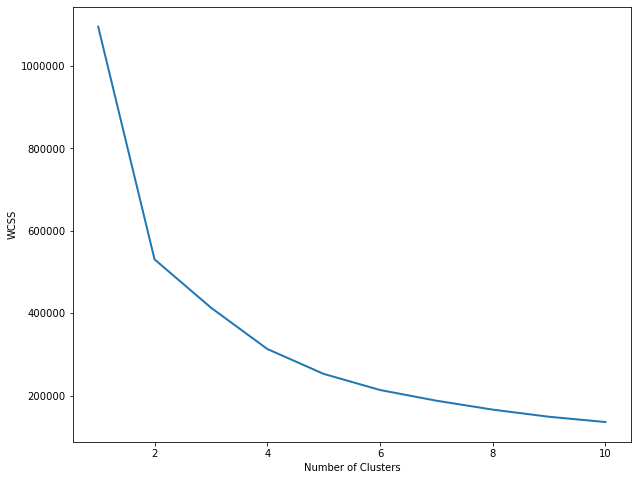

In [56]:
find_WCSS(NCL_targets_OHE)

In [79]:
def cluster1(df, number):

    kmeans = KMeans(n_clusters=number,init='k-means++',random_state=0)
    kmeans.fit(df.values)
    df_segm_kmeans = df.copy()
    df_segm_kmeans['Segment K-Means'] = kmeans.labels_
    df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()
    df_segm_analysis.rename({0: 'A',
                             1: 'B',
                             2: 'C'
                             },inplace=True)
    df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'A',
                                                                   1: 'B',
                                                                      2: 'C',
                                                                      
                                                                      })
    #print(df_segm_analysis)

    x_axis = df_segm_kmeans['profit']
    y_axis = df_segm_kmeans['RFM_Value']
    mpl.figure(figsize=(10,8))
    sn.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c'])
    mpl.title('Segmentation K-Means')
    mpl.show()  

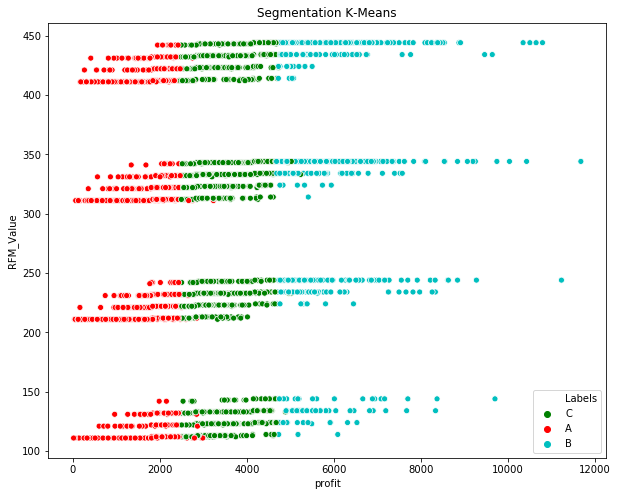

In [80]:
cluster1(df_OHE, 3)

In [65]:
def cluster2(df, number):

    kmeans = KMeans(n_clusters=number,init='k-means++',random_state=0)
    kmeans.fit(df.values)
    df_segm_kmeans = df.copy()
    df_segm_kmeans['Segment K-Means'] = kmeans.labels_
    df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()
    df_segm_analysis.rename({0: 'A',
                             1: 'B',
                             2: 'C'
                             },inplace=True)
    df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'A',
                                                                   1: 'B',
                                                                      2: 'C',
                                                                      
                                                                      })
    #print(df_segm_analysis)

    x_axis = df_segm_kmeans['past_3_years_bike_related_purchases']
    y_axis = df_segm_kmeans['Age']
    mpl.figure(figsize=(10,8))
    sn.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c'])    
    mpl.title('Segmentation K-Means')
    mpl.show()  


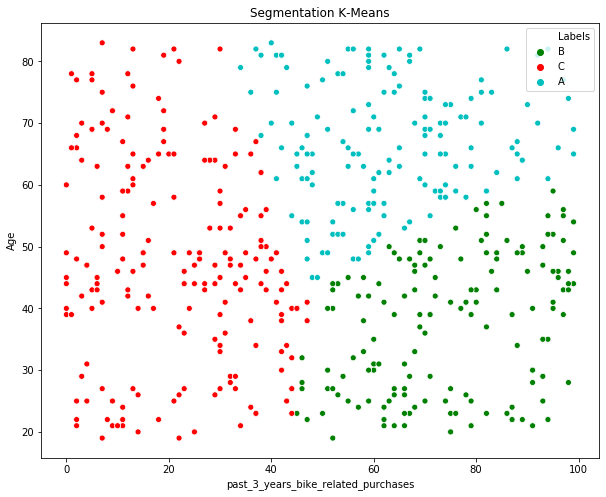

In [66]:
cluster2(NCL_targets_OHE, 3)

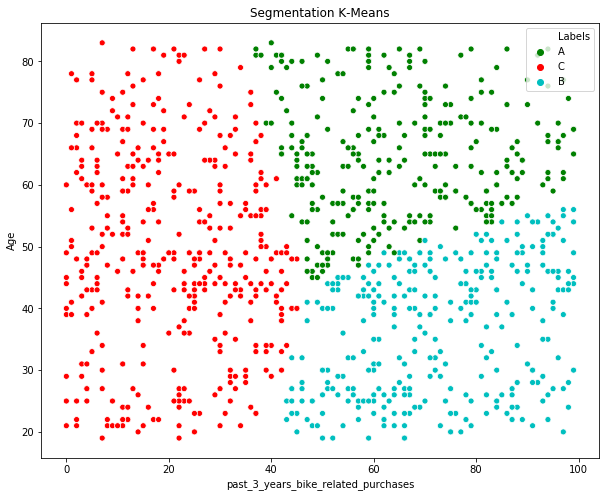

In [68]:
cluster2(NCL_OHE, 3)

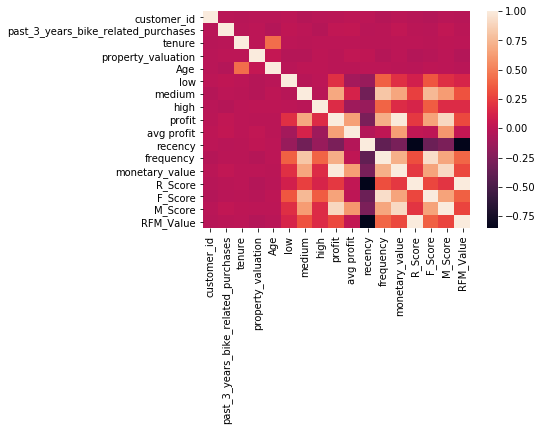

In [82]:
dataplot = sn.heatmap(df.corr())